In [10]:
# %pip install scikit-learn
# %pip install matplotlib
# %pip install pandas
# %pip install numpy

In [ ]:
import pandas as pd

from google.colab import drive

drive = drive.mount("/content/drive")
data = pd.read_csv('/content/drive/MyDrive/dataset_tcc.csv')




In [12]:
data['Grau de Sigilo'].value_counts()

Grau de Sigilo
reservado        4357
secreto           134
ultrassecreto     116
Name: count, dtype: int64

In [13]:
data.dtypes

Categoria            object
Dispositivo Legal    object
Grau de Sigilo       object
Tipo de Assunto      object
Assunto              object
dtype: object

In [14]:
def print_unique_col_values(data):
       for column in data:
            if data[column].dtypes=='object':
                print(f'{column}: {data[column].unique()}')

print_unique_col_values(data)

Categoria: ['Defesa e Segurança' 'SAUDE' 'Economia e Finanças'
 'Análise Fiscal e Financeira do Setor Público']
Dispositivo Legal: ['III' 'VIII' 'VII' 'II' 'IX' 'VI' 'IV' 'V' 'I' 'XVI']
Grau de Sigilo: ['secreto' 'reservado' 'ultrassecreto']
Tipo de Assunto: ['Saúde Pública' 'Inteligência e Investigação'
 'Segurança de Instituições e Autoridades' 'Relações Internacionais'
 'Pesquisa e Desenvolvimento' 'Estabilidade Financeira' 'Forças Armadas'
 'Defesa e Soberania']
Assunto: ['Processo Administrativo contendo Termo de Compromisso e anexos de Parceria para o Desenvolvimento Produtivo'
 'Acordo de Compensação Tecnológica entre Varian e Ministério da Saúde'
 'Processo investigativo inconcluso.'
 'Controle de Estoque de Insumos Estratégicos para Saúde.'
 'Plano de Demandas de Insumos Estratégicos para\xa0saude'
 'Plano Nacional de Imunização para CORONAVIRUS'
 'Análise preparatória acerca de aquisição de insumos estratégicos.'
 'Proposta de cooperação Internacional para produção de vacinas

In [15]:
yes_no_columns = ['Grau de Sigilo']
for col in yes_no_columns:
    data[col].replace({'ultrassecreto': 2,'reservado': 0,'secreto': 1},inplace=True)

/var/folders/st/g98hnzxj3v7bl991fd47rplm0000gn/T/ipykernel_10347/1466641706.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace({'ultrassecreto': 2,'reservado': 0,'secreto': 1},inplace=True)
/var/folders/st/g98hnzxj3v7bl991fd47rplm0000gn/T/ipykernel_10347/1466641706.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('fut

In [16]:
data_encoded = pd.get_dummies(data=data, columns=['Dispositivo Legal','Tipo de Assunto', 'Categoria', 'Assunto'])
data_encoded.columns

Index(['Grau de Sigilo', 'Dispositivo Legal_I', 'Dispositivo Legal_II',
       'Dispositivo Legal_III', 'Dispositivo Legal_IV', 'Dispositivo Legal_IX',
       'Dispositivo Legal_V', 'Dispositivo Legal_VI', 'Dispositivo Legal_VII',
       'Dispositivo Legal_VIII',
       ...
       'Assunto_Processo de Emissão de Títulos no Mercado Externo',
       'Assunto_Processo de Emissão de Títulos nos Mercados Internacionais',
       'Assunto_Processo investigativo inconcluso.',
       'Assunto_Projeto aquisição de helicópteros de médio porte para emprego geral das forças armadas e apoio logístico inicial - projeto HX-BR - financiamento externo junto ao consorcio de bancos privados liderado pelo banco Societe Generale.',
       'Assunto_Proposta de cooperação Internacional para produção de vacinas contra COVID-19',
       'Assunto_Relatório Monitora', 'Assunto_Requisição de Informação do TCU',
       'Assunto_Reunião do CGR', 'Assunto_Riscos Estratégicos STN',
       'Assunto_Riscos à Integridade

In [17]:
import numpy as np

X = data_encoded.drop('Grau de Sigilo',axis='columns')
y = testLabels = data_encoded['Grau de Sigilo'].astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print("Melhores parâmetros:", best_params)
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV 1/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.960 total time=   0.1s
[CV 2/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.985 total time=   0.1s
[CV 3/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.988 total time=   0.1s
[CV 4/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.988 total time=   0.1s
[CV 5/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.972 total time=   0.1s
[CV 6/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.972 total time=   0.1s
[CV 7/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.969 total time=   0.1s
[CV 8/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.

KeyboardInterrupt: 

In [ ]:
y_train.value_counts()

,count
Grau de Sigilo,
0.0,3049
1.0,94
2.0,81


In [ ]:
y.value_counts()

,count
Grau de Sigilo,
0.0,4357
1.0,134
2.0,116


In [ ]:
from imblearn.over_sampling import SMOTE

for column in X.select_dtypes(include=['bool']).columns:
    X[column] = X[column].astype(int)

y = y.astype(int)
smote = SMOTE(sampling_strategy='auto')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

,count
Grau de Sigilo,
1,4357
0,4357
2,4357


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.3, random_state=42, stratify=y_sm
)

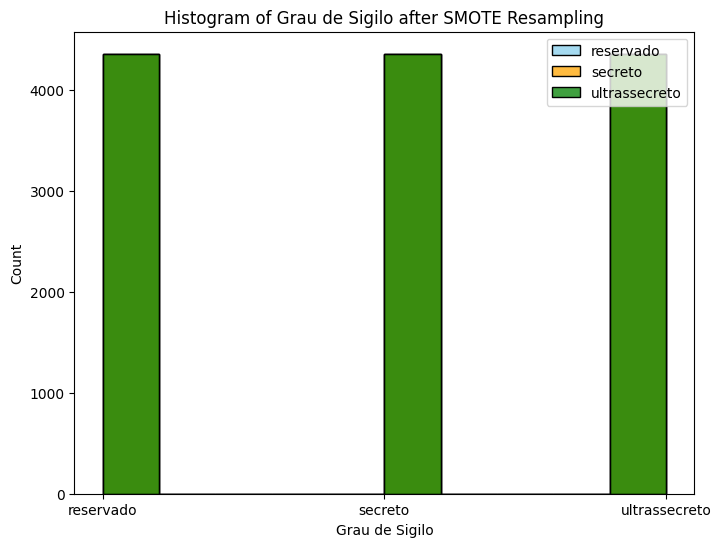

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns



class_mapping = {0: 'reservado', 1: 'secreto', 2: 'ultrassecreto'}

plt.figure(figsize=(8, 6))
sns.histplot(y_sm, bins=10, kde=False, color='skyblue', label=class_mapping[0])
sns.histplot(y_sm, bins=10, kde=False, color='orange', label=class_mapping[1])
sns.histplot(y_sm, bins=10, kde=False, color='green', label=class_mapping[2])

plt.xticks([0, 1, 2], [class_mapping[0], class_mapping[1], class_mapping[2]])

plt.xlabel('Grau de Sigilo')
plt.ylabel('Count')
plt.title('Histogram of Grau de Sigilo after SMOTE Resampling')
plt.legend()
plt.show()

In [ ]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print("Melhores parâmetros:", best_params)
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV 1/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.957 total time=   0.3s
[CV 2/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.942 total time=   0.3s
[CV 3/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.942 total time=   0.3s
[CV 4/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.946 total time=   0.3s
[CV 5/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.940 total time=   0.3s
[CV 6/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.931 total time=   0.3s
[CV 7/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.957 total time=   0.3s
[CV 8/10] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=50, random_state=42, min_samples_leaf=1, max_depth=None, min_samples_split=2)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 0.9456909739928608
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1307
           1       0.99      0.86      0.92      1307
           2       0.93      1.00      0.96      1308

    accuracy                           0.95      3922
   macro avg       0.95      0.95      0.94      3922
weighted avg       0.95      0.95      0.94      3922



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf_model = RandomForestClassifier(n_estimators=50, random_state=42, min_samples_leaf=1, max_depth=None, min_samples_split=2)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia: 0.9468451242829828
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       871
           1       0.99      0.86      0.92       872
           2       0.92      1.00      0.96       872

    accuracy                           0.95      2615
   macro avg       0.95      0.95      0.95      2615
weighted avg       0.95      0.95      0.95      2615



In [ ]:

y_proba = rf_model.predict_proba(X_test)
y_proba

array([[0.9054836 , 0.0945164 , 0.        ],
       [0.00673597, 0.06544011, 0.92782392],
       [0.00673597, 0.06544011, 0.92782392],
       ...,
       [0.00673597, 0.06544011, 0.92782392],
       [0.9054836 , 0.0945164 , 0.        ],
       [0.01166077, 0.98833923, 0.        ]])

In [ ]:

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       871
           1       0.99      0.86      0.92       872
           2       0.92      1.00      0.96       872

    accuracy                           0.95      2615
   macro avg       0.95      0.95      0.95      2615
weighted avg       0.95      0.95      0.95      2615



In [ ]:
from sklearn.metrics import roc_auc_score

# Avaliar usando ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.9621925826355864


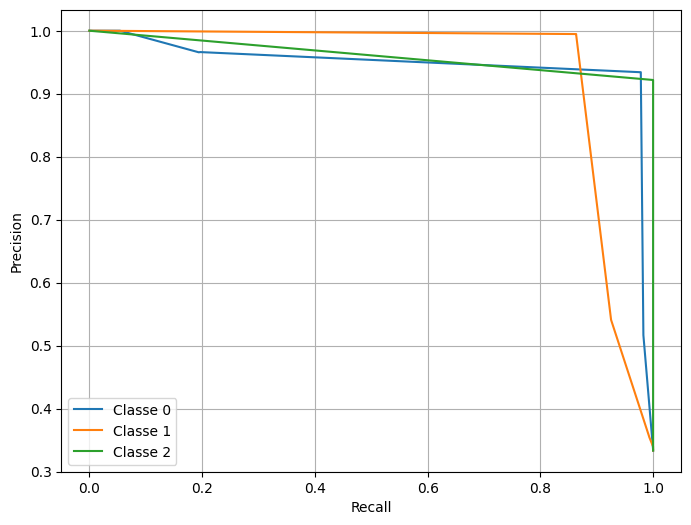

Average Precision para Classe 0: 0.9299460485670419
Average Precision para Classe 1: 0.9189071609103275
Average Precision para Classe 2: 0.9217758985200846


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score


from sklearn.preprocessing import label_binarize
y_true_bin = label_binarize(y_test, classes=[0, 1, 2])

plt.figure(figsize=(8, 6))
for i in range(y_proba.shape[1]):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], [prob[i] for prob in y_proba])

    plt.plot(recall, precision, label=f'Classe {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

for i in range(y_proba.shape[1]):
    avg_precision = average_precision_score(y_true_bin[:, i], [prob[i] for prob in y_proba])
    print(f'Average Precision para Classe {i}: {avg_precision}')


In [ ]:
import joblib

joblib.dump(rf_model, 'random_forest_model_GOV.pkl')

print("Modelo exportado com sucesso!")

Modelo exportado com sucesso!
